# Capítulo 4 - Análise de grupos

## Bibliotecas básicas e outras inicializações

In [1]:
import warnings
import random
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

warnings.filterwarnings('ignore')

## Carregamento dos dados

In [2]:
dados = pd.read_csv('./datasets/Iris.csv')
print(f'Linhas: {dados.shape[0]} | Colunas: {dados.shape[1]}')
dados.head()

Linhas: 150 | Colunas: 6


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
dados.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

## Medidas de similaridade

### Distância Euclideana

In [4]:
from scipy.spatial.distance import pdist, squareform
distancia = squareform(pdist(dados.drop(['Species', 'Id'], axis=1).values, metric='euclidean'))
print(distancia)

[[0.         0.53851648 0.50990195 ... 4.45982062 4.65080638 4.14004831]
 [0.53851648 0.         0.3        ... 4.49888875 4.71805044 4.15331193]
 [0.50990195 0.3        0.         ... 4.66154481 4.84871117 4.29883705]
 ...
 [4.45982062 4.49888875 4.66154481 ... 0.         0.6164414  0.64031242]
 [4.65080638 4.71805044 4.84871117 ... 0.6164414  0.         0.76811457]
 [4.14004831 4.15331193 4.29883705 ... 0.64031242 0.76811457 0.        ]]


### Distância de Jaccard

In [5]:
distancia = squareform(pdist(dados.drop(['Species', 'Id'], axis=1).values, metric='jaccard'))
print(distancia)

[[0.   0.5  0.75 ... 1.   1.   1.  ]
 [0.5  0.   0.75 ... 0.75 1.   0.75]
 [0.75 0.75 0.   ... 1.   1.   1.  ]
 ...
 [1.   0.75 1.   ... 0.   1.   0.75]
 [1.   1.   1.   ... 1.   0.   1.  ]
 [1.   0.75 1.   ... 0.75 1.   0.  ]]


### Distância de Hamming

In [6]:
distancia = squareform(pdist(dados.drop(['Species', 'Id'], axis=1).values, metric='hamming'))
print(distancia)

[[0.   0.5  0.75 ... 1.   1.   1.  ]
 [0.5  0.   0.75 ... 0.75 1.   0.75]
 [0.75 0.75 0.   ... 1.   1.   1.  ]
 ...
 [1.   0.75 1.   ... 0.   1.   0.75]
 [1.   1.   1.   ... 1.   0.   1.  ]
 [1.   0.75 1.   ... 0.75 1.   0.  ]]


### Distância de Matching

In [7]:
distancia = squareform(pdist(dados.drop(['Species', 'Id'], axis=1).values, metric='matching'))
print(distancia)

[[0.   0.5  0.75 ... 1.   1.   1.  ]
 [0.5  0.   0.75 ... 0.75 1.   0.75]
 [0.75 0.75 0.   ... 1.   1.   1.  ]
 ...
 [1.   0.75 1.   ... 0.   1.   0.75]
 [1.   1.   1.   ... 1.   0.   1.  ]
 [1.   0.75 1.   ... 0.75 1.   0.  ]]


## Métodos de agrupamento e representação de grupos

In [8]:
dados_copy = dados.drop(['Species', 'Id'], axis=1).copy().values

### Agrupamento hierárquico aglomerativo

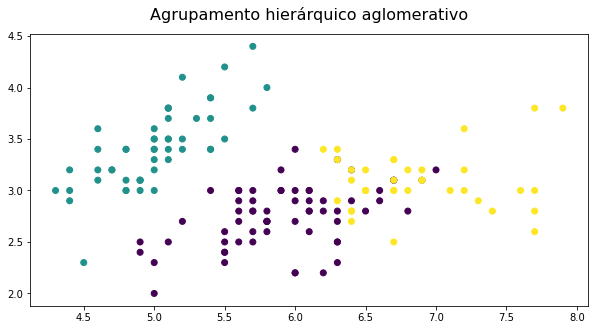

In [9]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
cluster.fit_predict(dados_copy)

plt.figure(figsize=(10, 5))
plt.title('Agrupamento hierárquico aglomerativo', fontsize=16, y=1.03)
plt.scatter(dados_copy[:, 0], dados_copy[:, 1], c=cluster.labels_, cmap='viridis')
plt.show()

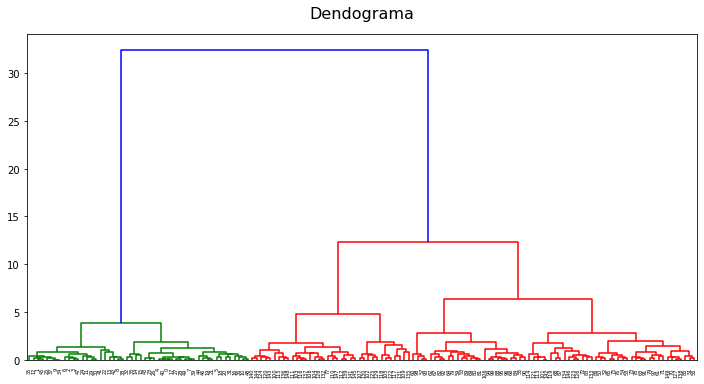

In [10]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(12, 6))
plt.title('Dendograma', fontsize=16, y=1.03)
dend = shc.dendrogram(shc.linkage(dados_copy, method='ward'))

### Agrupamento particional

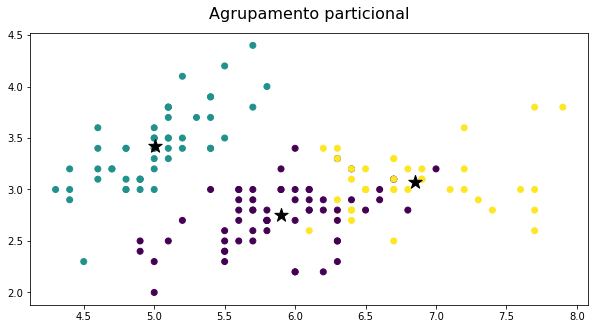

In [11]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit_predict(dados_copy)

plt.figure(figsize=(10, 5))
plt.title('Agrupamento particional', fontsize=16, y=1.03)
plt.scatter(dados_copy[:, 0], dados_copy[:, 1], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='k', marker='*')
plt.show()

## Avaliação de agrupamento

In [12]:
kmeans_model = KMeans(n_clusters=3).fit(dados_copy)
labels = kmeans_model.labels_

### Medidas internas

Índice da silhueta

In [13]:
from sklearn.metrics import silhouette_score
silhouette_score(dados_copy, labels, metric='euclidean')

0.5525919445499757

Índice Davies-Bouldin

In [14]:
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(dados_copy, labels)

0.6623228649898735

Índice de Calinski-Harabasz

In [15]:
from sklearn.metrics import calinski_harabasz_score
calinski_harabasz_score(dados_copy, labels)

560.3999242466402

### Medidas externas

In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(dados['Species'])

Índice de Rand

In [17]:
from sklearn.metrics import adjusted_rand_score
adjusted_rand_score(y, labels)

0.7302382722834697

Homogeneidade

In [18]:
from sklearn.metrics import homogeneity_score
homogeneity_score(y, labels)

0.7514854021988338

Completude

In [19]:
from sklearn.metrics import completeness_score
completeness_score(y, labels)

0.7649861514489815

Índice Fowlkes-Mallows

In [20]:
from sklearn.metrics import fowlkes_mallows_score
fowlkes_mallows_score(y, labels)

0.8208080729114153

## Algoritmo de agrupamento

In [21]:
dados_copy = dados.drop(['Species', 'Id'], axis=1).copy().values

### K-Means

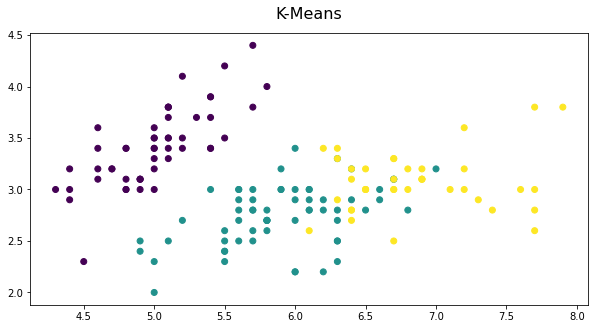

In [22]:
kmeans = KMeans(n_clusters=3)
kmeans.fit_predict(dados_copy)

plt.figure(figsize=(10, 5))
plt.title('K-Means', fontsize=16, y=1.03)
plt.scatter(dados_copy[:, 0], dados_copy[:, 1], c=kmeans.labels_, cmap='viridis')
plt.show()

### K-Medoids

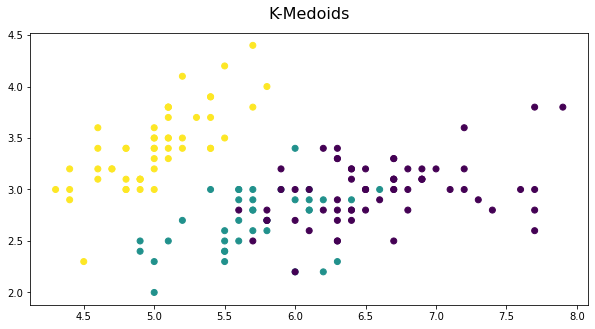

In [23]:
from sklearn_extra.cluster import KMedoids

kmedoids = KMedoids(n_clusters=3)
kmedoids.fit_predict(dados_copy)

plt.figure(figsize=(10, 5))
plt.title('K-Medoids', fontsize=16, y=1.03)
plt.scatter(dados_copy[:, 0], dados_copy[:, 1], c=kmedoids.labels_, cmap='viridis')
plt.show()

### Fuzzy K-Means

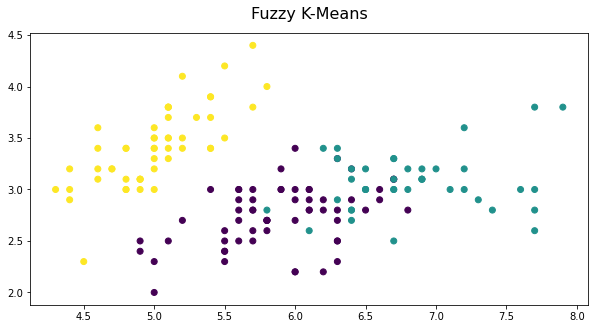

In [24]:
from fcmeans import FCM

fcm = FCM(n_clusters=3)
fcm.fit(dados_copy)
fcm_labels = fcm.predict(dados_copy)

plt.figure(figsize=(10, 5))
plt.title('Fuzzy K-Means', fontsize=16, y=1.03)
plt.scatter(dados_copy[:, 0], dados_copy[:, 1], c=fcm_labels, cmap='viridis')
plt.show()

### Árvore geradora mínima

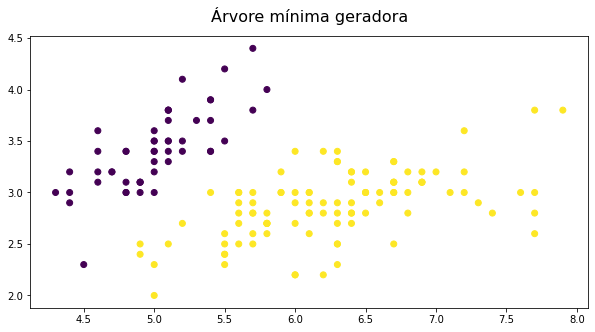

In [25]:
from mst_clustering import MSTClustering

mst = MSTClustering(cutoff_scale=2)
labels = mst.fit_predict(dados_copy)

plt.figure(figsize=(10, 5))
plt.title('Árvore mínima geradora', fontsize=16, y=1.03)
plt.scatter(dados_copy[:, 0], dados_copy[:, 1], c=labels, cmap='viridis')
plt.show()

### DBSCAN

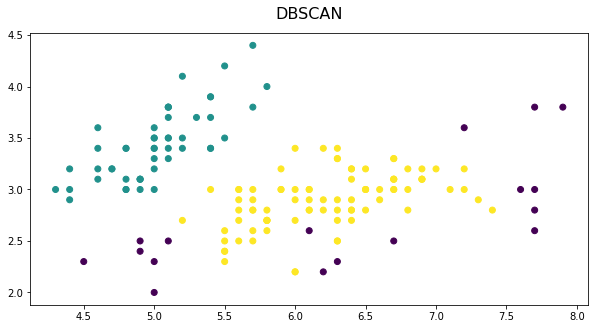

In [26]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN()
labels = dbscan.fit_predict(dados_copy)

plt.figure(figsize=(10, 5))
plt.title('DBSCAN', fontsize=16, y=1.03)
plt.scatter(dados_copy[:, 0], dados_copy[:, 1], c=labels, cmap='viridis')
plt.show()

### Single-linkage

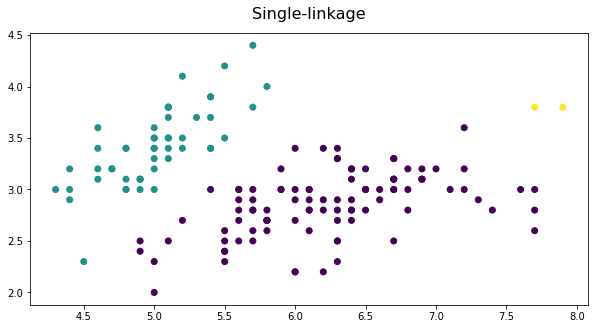

In [27]:
single_linkage = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='single')
single_linkage.fit_predict(dados_copy)

plt.figure(figsize=(10, 5))
plt.title('Single-linkage', fontsize=16, y=1.03)
plt.scatter(dados_copy[:, 0], dados_copy[:, 1], c=single_linkage.labels_, cmap='viridis')
plt.show()

### Complete-linkage

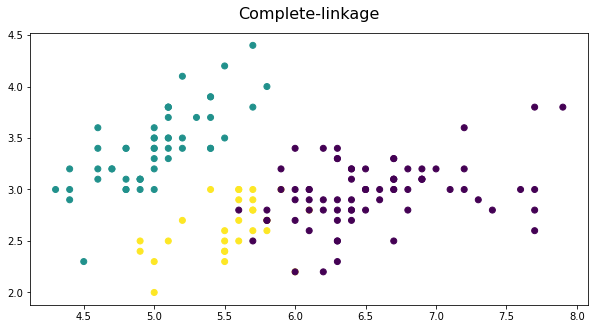

In [28]:
complete_linkage = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')
complete_linkage.fit_predict(dados_copy)

plt.figure(figsize=(10, 5))
plt.title('Complete-linkage', fontsize=16, y=1.03)
plt.scatter(dados_copy[:, 0], dados_copy[:, 1], c=complete_linkage.labels_, cmap='viridis')
plt.show()